In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Dealing With Numerical Columns|

In [4]:
con_cols = data.select_dtypes(include='number').columns
con_cols

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
#drop Id 
data.drop(columns= ['id'], inplace = True)
#verify:
con_cols = data.select_dtypes(include='number').columns
con_cols

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

Check Null values ==> Handling it

In [6]:
data[con_cols].isnull().sum() #no null values!!

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
#for numerical cols only
corr = data[con_cols].corr()
#create a mask for the upper triangle to avoid duplicated values
mask = np.triu(np.ones_like(corr, dtype=bool))

In [8]:
#intractive way
import plotly.express as px

fig = px.imshow(corr, text_auto=True, aspect="auto", color_continuous_scale='RdBu_r', zmin=-1, zmax=1)
fig.update_layout(title="Interactive Correlation Heatmap")
fig.show()


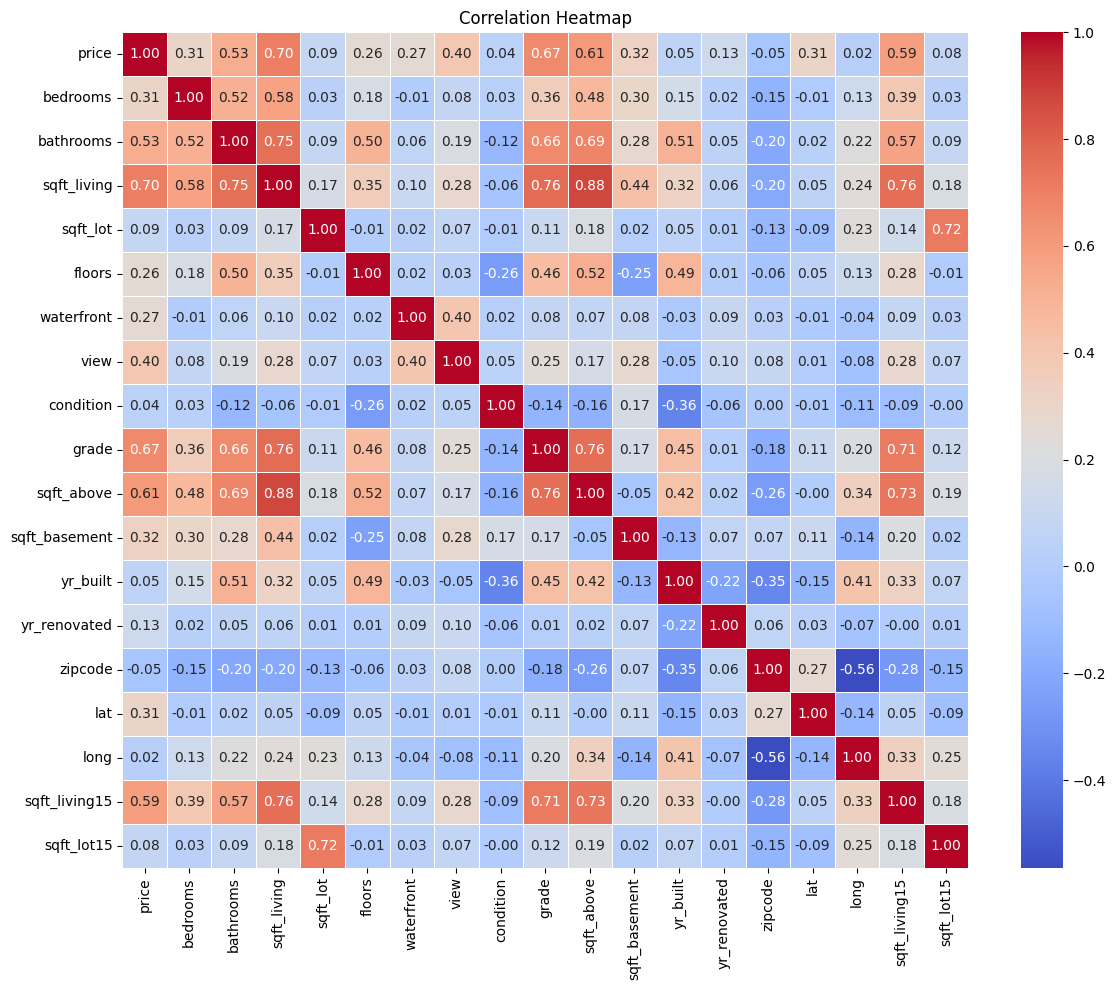

In [9]:
#let draw it: 
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
# 4. Draw the heatmap with the mask
sns.heatmap(
    corr,
    #mask
    annot=True,        # show correlation values
    fmt=".2f",         # format for annotations
    cmap="coolwarm",#annot_kws={"size":8},
    linewidths=.5,     # line width between cells
)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Analysis for highly correlated features

In [10]:
lower_corrrelation = corr.where(np.tril(np.ones(corr.shape)).astype(bool))#actualy, it's a dataframe!!
lower_corrrelation

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,0.308350,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,0.525138,0.515884,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_living,0.702035,0.576671,0.754665,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


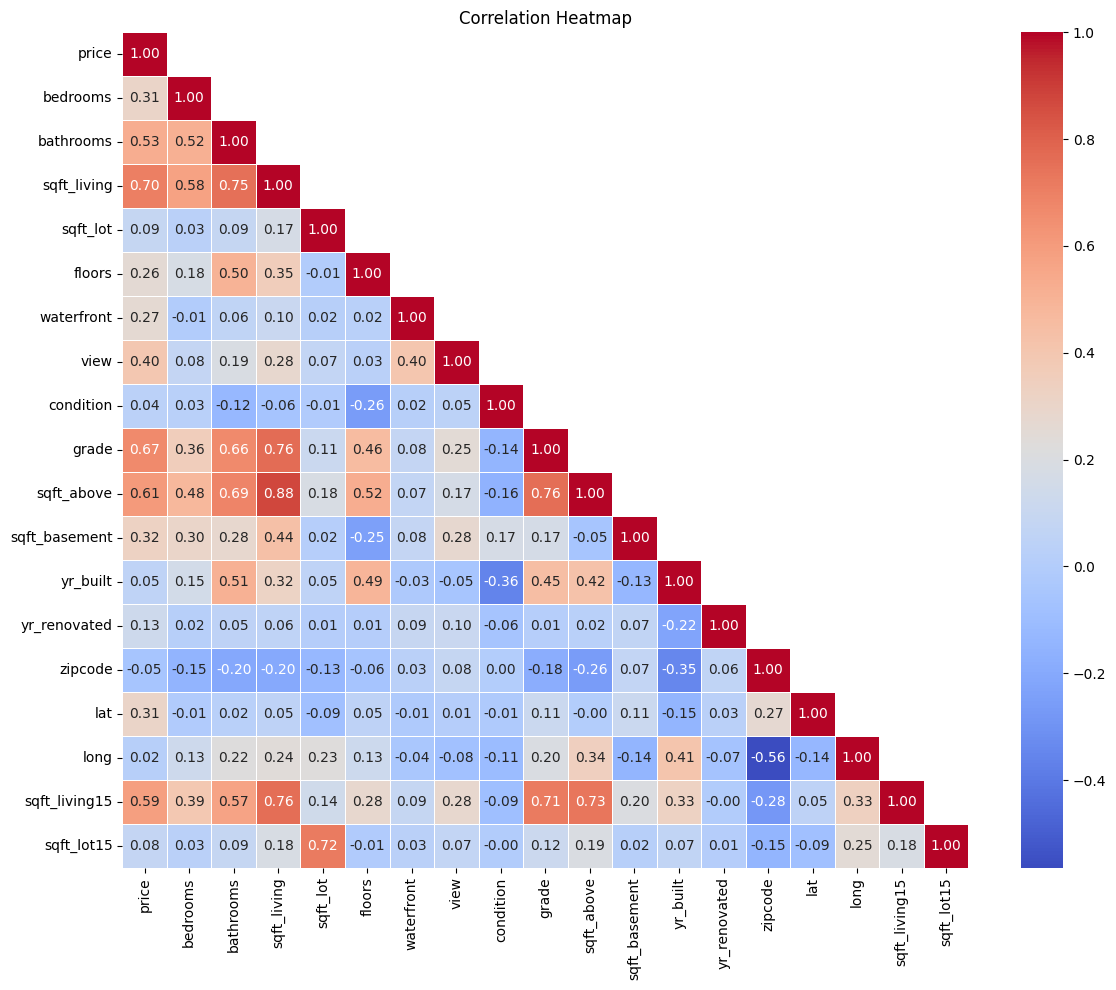

In [11]:
#let draw it: 
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
# 4. Draw the heatmap with the mask
sns.heatmap(
    lower_corrrelation,
    #mask
    annot=True,        # show correlation values
    fmt=".2f",         # format for annotations
    cmap="coolwarm",#annot_kws={"size":8},

    linewidths=.5,     # line width between cells
)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [12]:
#now , let's how high correlated features:
from collections import defaultdict
def correlated_features(corr_matrix, limit = 0.95):
    #store correlated features
    correlated = defaultdict(list)
    columns = corr_matrix.columns  
    for i in range(corr_matrix.shape[0]):
        for j in range(i+1,corr_matrix.shape[0]):#plus one to avoid getting correlated the feature with itself
            if corr_matrix.iloc[i,j]>=limit:
                correlated[columns[i]].append(columns[j])
                print(f'{columns[i]:20s} {columns[j]:20s} {corr_matrix.iloc[i,j]}')
    return correlated

In [13]:
correlated_features = correlated_features(corr, limit =0.6)

price                sqft_living          0.7020350546118005
price                grade                0.6674342560202353
price                sqft_above           0.6055672983560784
bathrooms            sqft_living          0.7546652789673752
bathrooms            grade                0.6649825338780723
bathrooms            sqft_above           0.6853424758761547
sqft_living          grade                0.7627044764584776
sqft_living          sqft_above           0.8765965986813202
sqft_living          sqft_living15        0.7564202590172237
sqft_lot             sqft_lot15           0.7185567524330374
grade                sqft_above           0.755922937623647
grade                sqft_living15        0.7132020930151698
sqft_above           sqft_living15        0.7318702923539875


In [14]:
correlated_features

defaultdict(list,
            {'price': ['sqft_living', 'grade', 'sqft_above'],
             'bathrooms': ['sqft_living', 'grade', 'sqft_above'],
             'sqft_living': ['grade', 'sqft_above', 'sqft_living15'],
             'sqft_lot': ['sqft_lot15'],
             'grade': ['sqft_above', 'sqft_living15'],
             'sqft_above': ['sqft_living15']})

we ue correlation to drop highly correlated features, "Feature Selection Approach"

But we keep the features that highly correlated with target feature!

now let's draw the correlated features as scatter plot, to show the relationship between features:

# Using Scatter plot

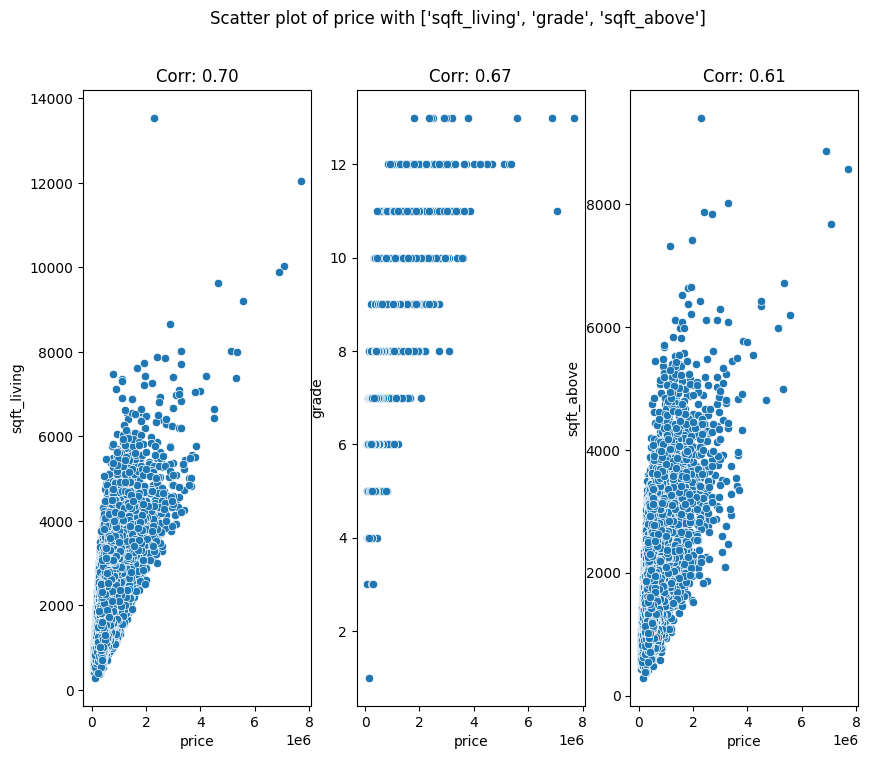

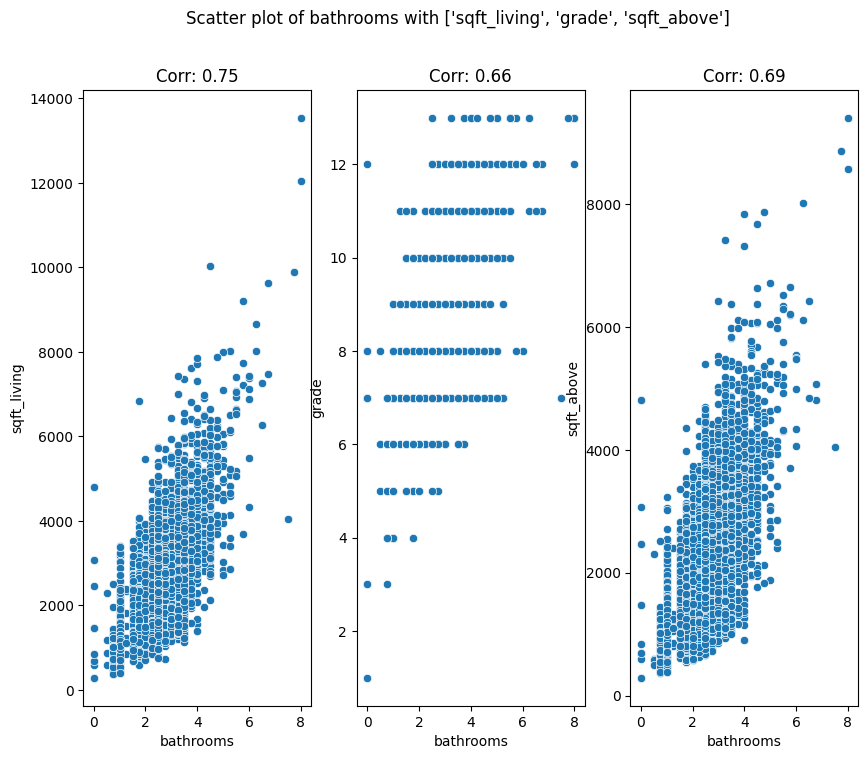

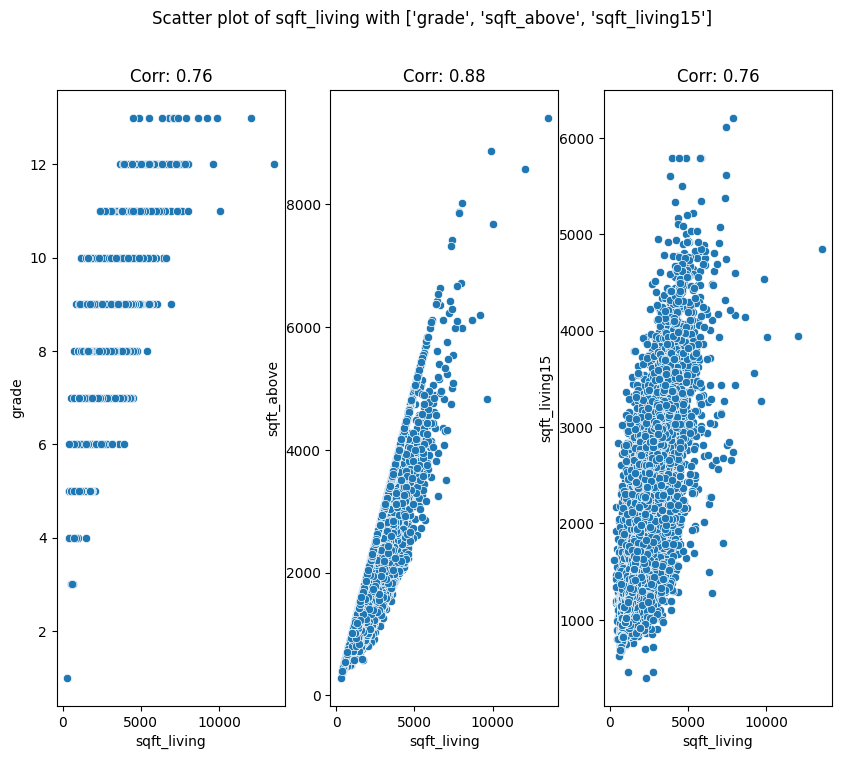

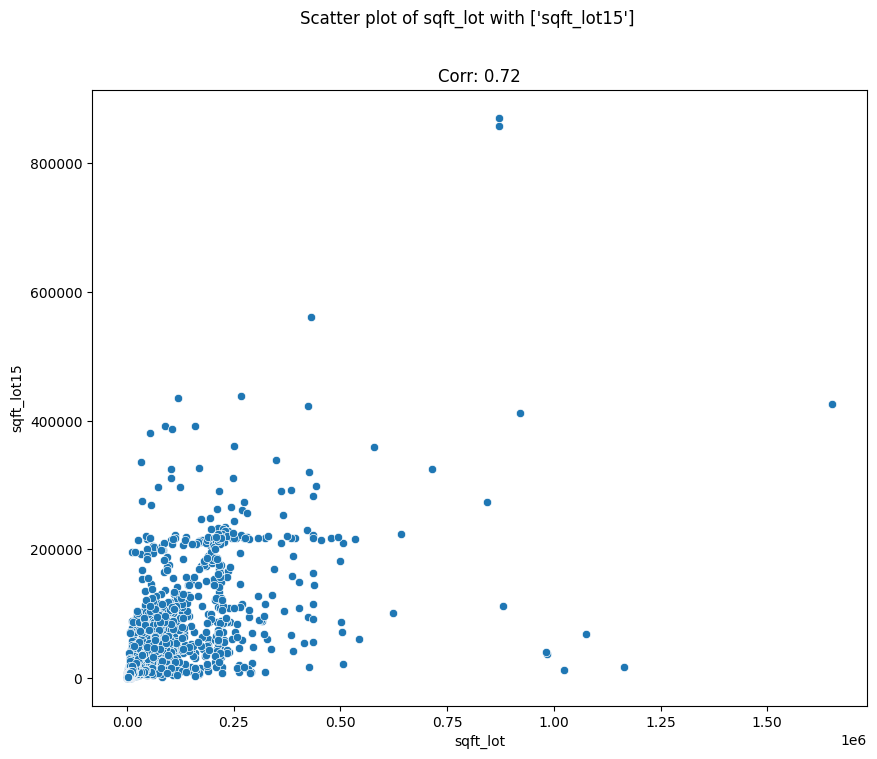

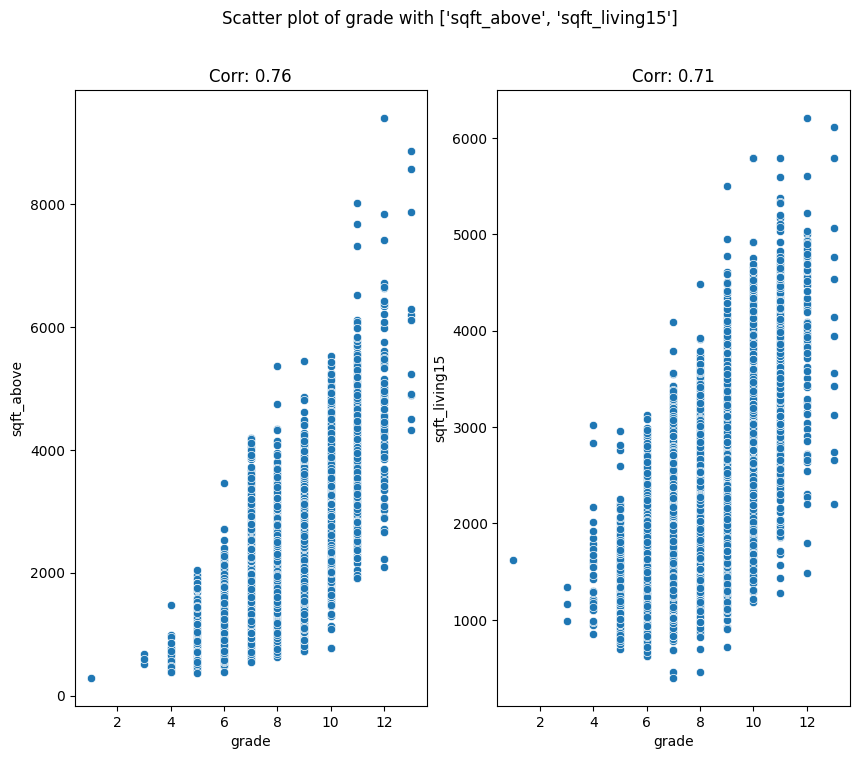

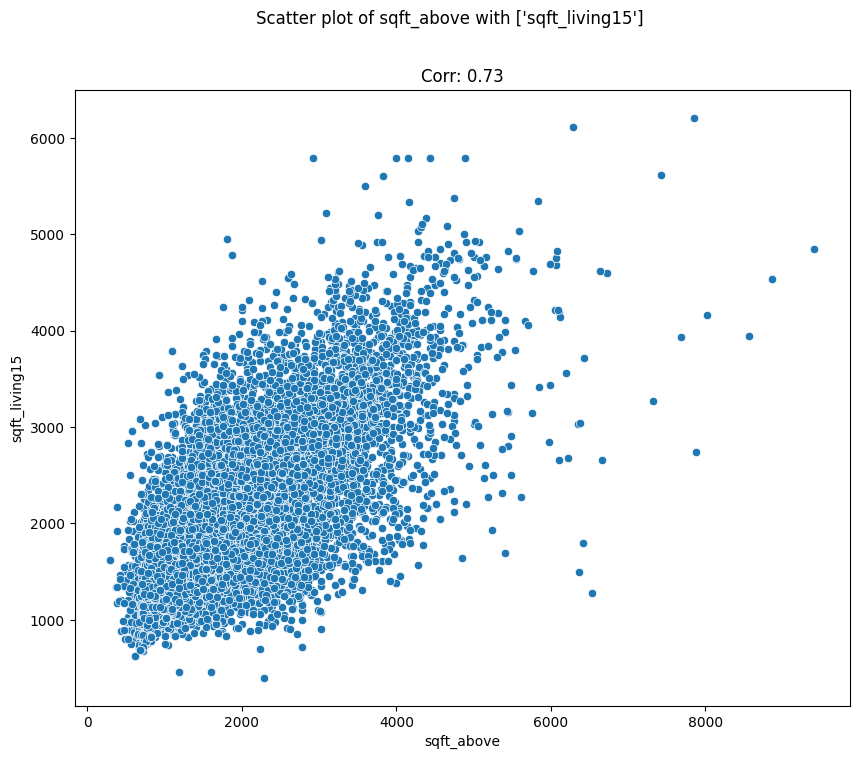

In [15]:
def scatterForCorreleated(correlated_features,correlation_info):
    for feature in correlated_features.keys():
        n_cols = len(correlated_features[feature])
        plt.figure(figsize =(10, 8)) # we can adjust this figure depend on number of figures
        for ind , col in enumerate(correlated_features[feature], 1):
            plt.subplot(1,  n_cols , ind )
            sns.scatterplot(x = data[feature], y = data[col])
            plt.title(f'Corr: {correlation_info[feature][col]:0.2f}')
        plt.suptitle(f'Scatter plot of {feature} with {correlated_features[feature]}')
        plt.show()
scatterForCorreleated(correlated_features,lower_corrrelation)

# Using Scatter Matrix:

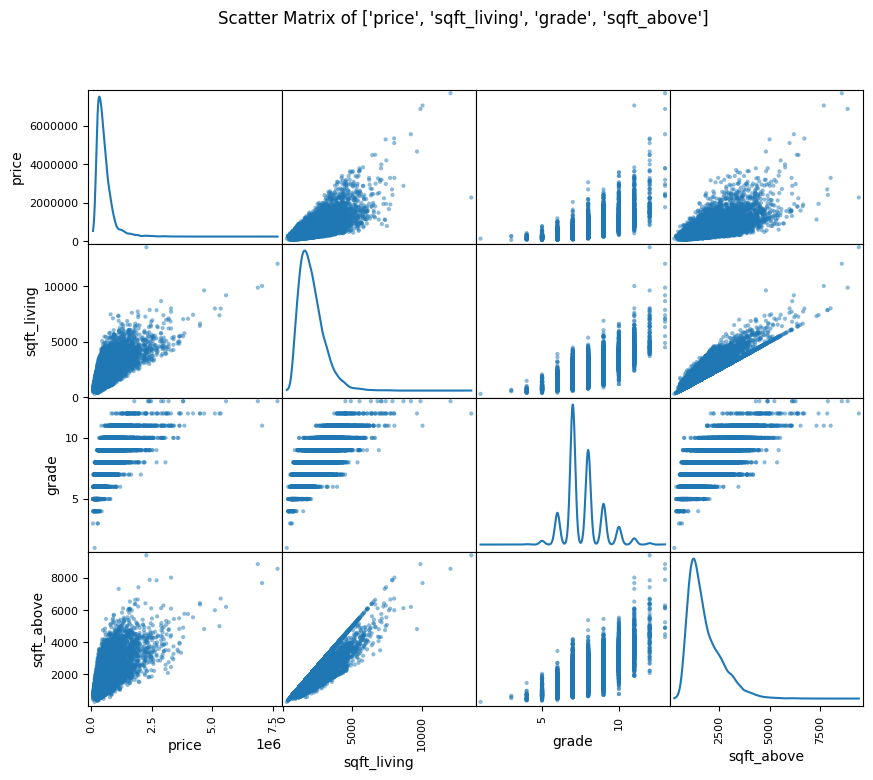

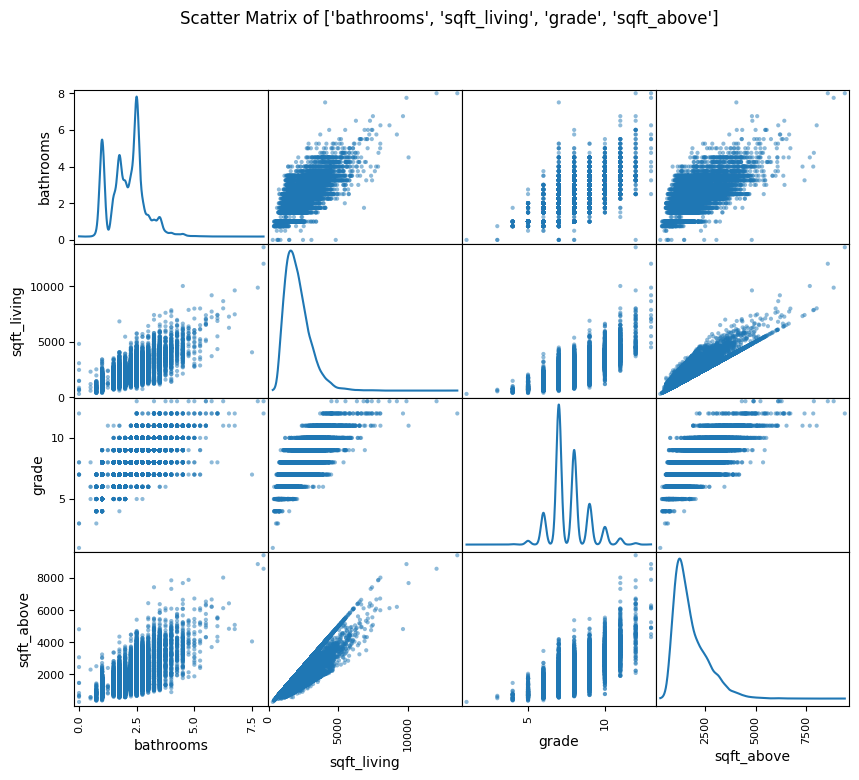

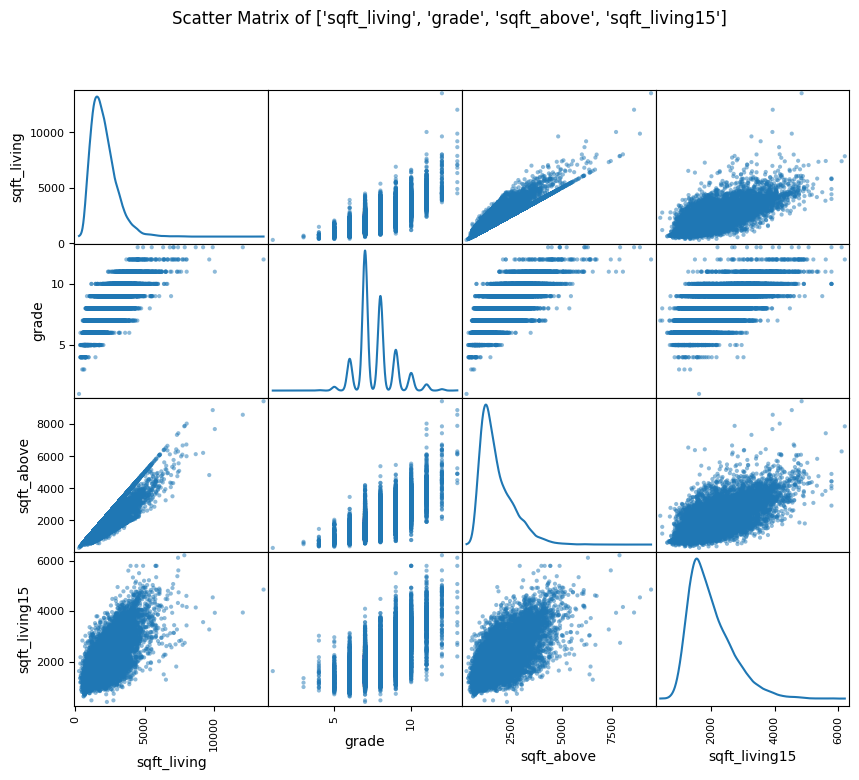

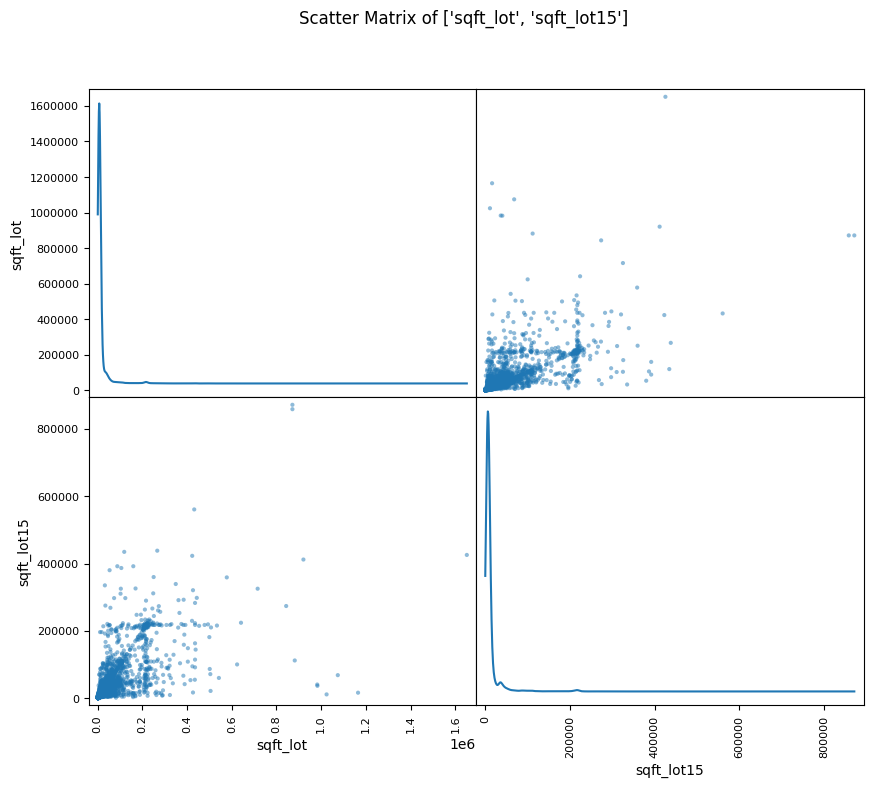

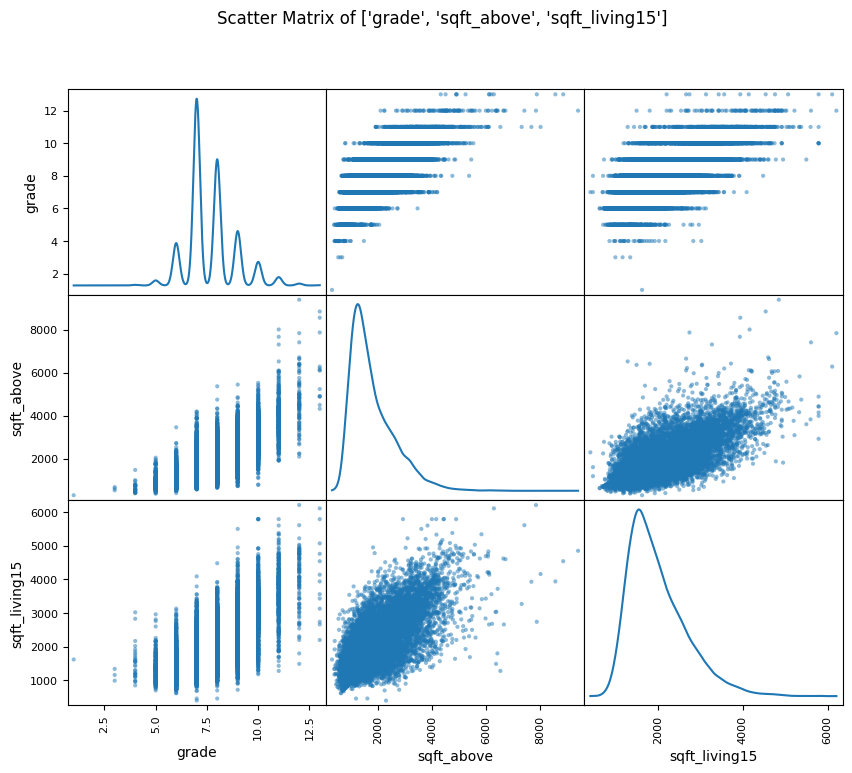

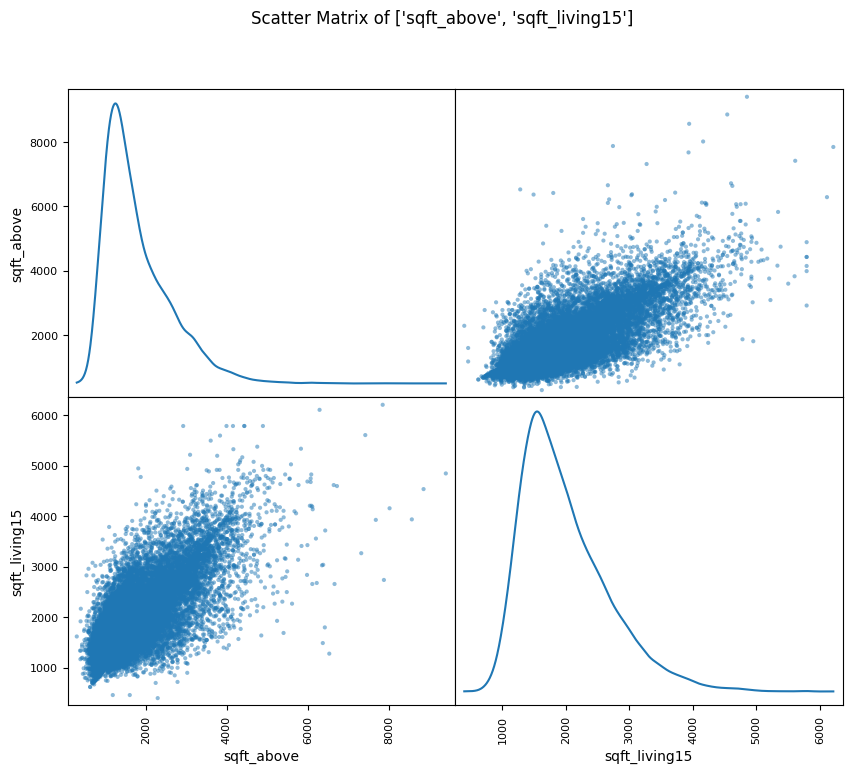

In [16]:
from pandas.plotting import scatter_matrix
def scatter_matrixForCorreleated(correlated_features):
    for feature in correlated_features.keys():
        correlated = [feature , *correlated_features[feature]]
        scatter_matrix(data[correlated], figsize=(10, 8), diagonal='kde')
        plt.suptitle(f'Scatter Matrix of {correlated}')
        plt.show()
scatter_matrixForCorreleated(correlated_features)

So, from above analysis, we can remove highly correlated features!

Acutally, this is done manually and then test the accuracy of our selection after applying 

the selected featurs on ML algorithm and measure the metrics!

This dataset in our example doesn't have highly correlated featues because the max correlation index is about %75!


In [17]:
#if your dataset highly correlated features and you need to detect highly correlated features:
#find featrues which have highly correlated:

#we need to take the upper of correlation matrix:
upper_corrrelation = corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))#actualy, it's a dataframe!!
to_drop = [column for column in upper_corrrelation.columns if any(upper_corrrelation[column] > 0.90)]
to_drop

[]

In [18]:
# #let's get more information outliers, how many , how precentage to the total length?!
# def outliers_info(df, col):
#     q1, q3 = df[col].quantile(.25), df[col].quantile(.75)
#     IQR = q3 -q1
#     lowerFence, upperFence = (q1 - 1.5*IQR) , (q3 + 1.5 *IQR)
#     outliers_index = (df[col] > upperFence) | (df[col] < lowerFence)
#     outliers_values =  df[col].values[outliers_index]
#     length = len(outliers_values)
#     precentage = (length / len(df[col])) * 100 
#     return outliers_values, length, precentage